<a href="https://colab.research.google.com/github/JRX99/camera-calibration/blob/main/zdo_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy
from scipy import ndimage
import scipy.signal
import scipy.misc
import skimage.data
from skimage import color as color
import skimage.io as io
import skimage.feature
import matplotlib.pyplot as plt

from skimage.transform import hough_line
from skimage.draw import line

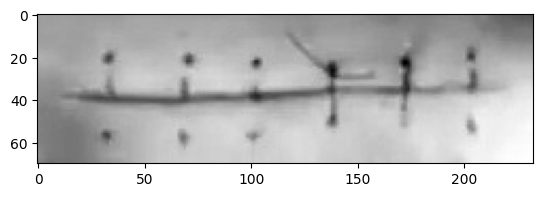

In [ ]:
image = io.imread("test2.jpg")
image=color.rgb2gray(image)
plt.imshow(image, cmap='gray')

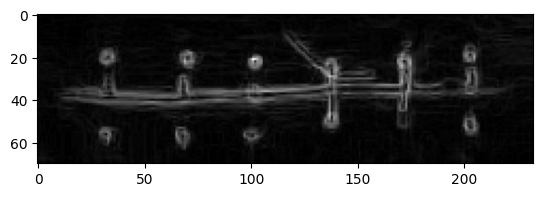

In [ ]:
edge_roberts = skimage.filters.roberts(image)

plt.imshow(edge_roberts, cmap='gray')

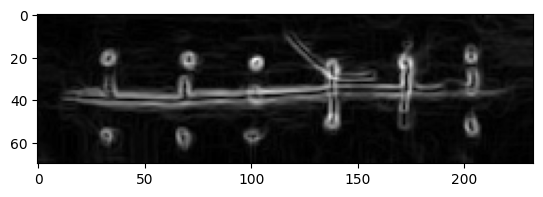

In [ ]:
edge_sobel = skimage.filters.sobel(image)

plt.imshow(edge_sobel, cmap='gray')

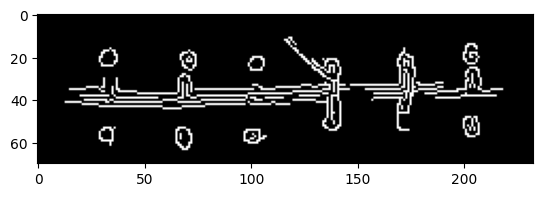

In [ ]:
edge_canny_sobel = skimage.feature.canny(edge_sobel, sigma=0.5)
plt.imshow(edge_canny_sobel, cmap='gray')


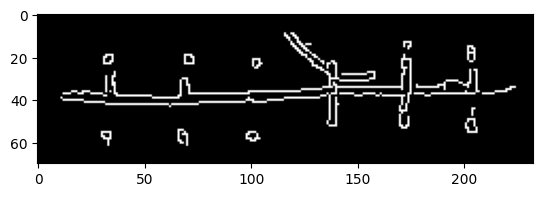

In [ ]:
edge_canny = skimage.feature.canny(image, sigma=0.5)
plt.imshow(edge_canny, cmap='gray')

(0.0, 233.0, 70.0, 0.0)

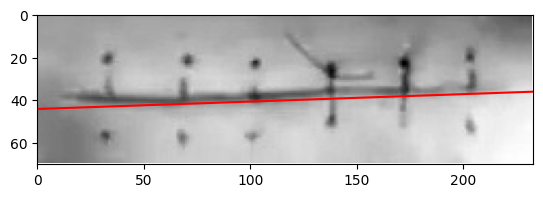

In [ ]:
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
import math
h, theta, d = hough_line(edge_canny)
vertical_h, vertical_theta, vertical_d =hough_line(edge_canny,theta=np.array([3*math.pi/2,math.pi/2]))
plt.imshow(image, cmap=plt.cm.gray)
rows, cols = image.shape
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - cols * np.cos(angle)) / np.sin(angle)
    plt.plot((0, cols), (y0, y1), '-r')

plt.axis((0, cols, rows, 0))